#Read the data

In [17]:
import pandas as pd 

import matplotlib.pyplot as plt

                                                Read CSV File

In [16]:
file_path = 'C:\V_S_Code\california_housing_test.csv'
df=pd.read_csv(file_path)


                                                    Describtion

In [7]:
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df.columns, df_head, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'),
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.05     37.37                27.0       3885.0           661.0   
 1    -118.30     34.26                43.0       1510.0           310.0   
 2    -117.81     33.78                27.0       3589.0           507.0   
 3    -118.36     33.82                28.0         67.0            15.0   
 4    -119.67     36.33                19.0       1241.0           244.0   
 
    population  households  median_income  median_house_value  
 0      1537.0       606.0         6.6085            344700.0  
 1       809.0       277.0         3.5990            176500.0  
 2      1484.0       495.0         5.7934            270500.0  
 3        49.0        11.0         6.1359            330000.0  
 4       850.0       237.0

In [12]:
housing_median_age = df["housing_median_age"].describe()
housing_median_age

count    3000.000000
mean       28.845333
std        12.555396
min         1.000000
25%        18.000000
50%        29.000000
75%        37.000000
max        52.000000
Name: housing_median_age, dtype: float64

In [13]:
correlation = df["median_income"].corr(df["median_house_value"])
print("Correlation:", correlation)

Correlation: 0.6726951532511668


In [14]:
top_areas = df.sort_values(by="median_house_value", ascending=False).head(5)
print(top_areas[["latitude", "longitude", "median_house_value"]])

      latitude  longitude  median_house_value
2999     34.42    -119.63            500001.0
2053     37.45    -122.25            500001.0
117      37.34    -122.07            500001.0
118      33.02    -117.18            500001.0
2152     33.96    -118.43            500001.0


In [15]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
average_rph = df["rooms_per_household"].mean()
print("Average Rooms per Household:", round(average_rph, 2))

Average Rooms per Household: 5.41


      total_rooms  households  latitude  longitude
33        16181.0      2651.0     34.55    -118.08
292       24121.0      2221.0     33.78    -116.36
321       20354.0      3293.0     37.68    -121.73
405       12779.0      2157.0     35.62    -120.67
555       10722.0      1511.0     34.12    -118.45
650       11976.0      2009.0     33.57    -117.73
899       10212.0      1374.0     37.93    -122.10
900       18123.0      2964.0     32.95    -117.22
947       11654.0      2127.0     33.91    -117.23
976       11635.0      2009.0     34.11    -117.58
978       27870.0      4855.0     38.48    -121.53
1083      14291.0      1875.0     34.13    -118.60
1146      23915.0      3958.0     33.15    -117.27
1283      15025.0      2392.0     32.92    -117.18
1352      12128.0      2040.0     37.42    -121.87
1386      10110.0      1703.0     33.93    -117.25
1441      10265.0      1906.0     39.76    -121.89
1554      12689.0      2230.0     34.02    -117.71
1563      18132.0      4930.0  

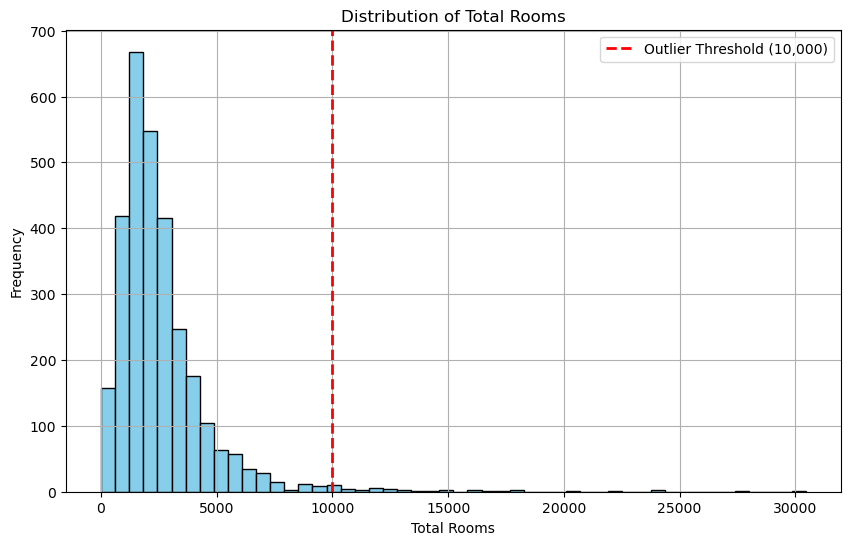

In [18]:
high_room_rows = df[df["total_rooms"] > 10000]
print(high_room_rows[["total_rooms", "households", "latitude", "longitude"]])

plt.figure(figsize=(10, 6))
plt.hist(df["total_rooms"], bins=50, color='skyblue', edgecolor='black')
plt.axvline(10000, color='red', linestyle='dashed', linewidth=2, label='Outlier Threshold (10,000)')
plt.title("Distribution of Total Rooms")
plt.xlabel("Total Rooms")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Minimum Population: 5.0
Maximum Population: 11935.0


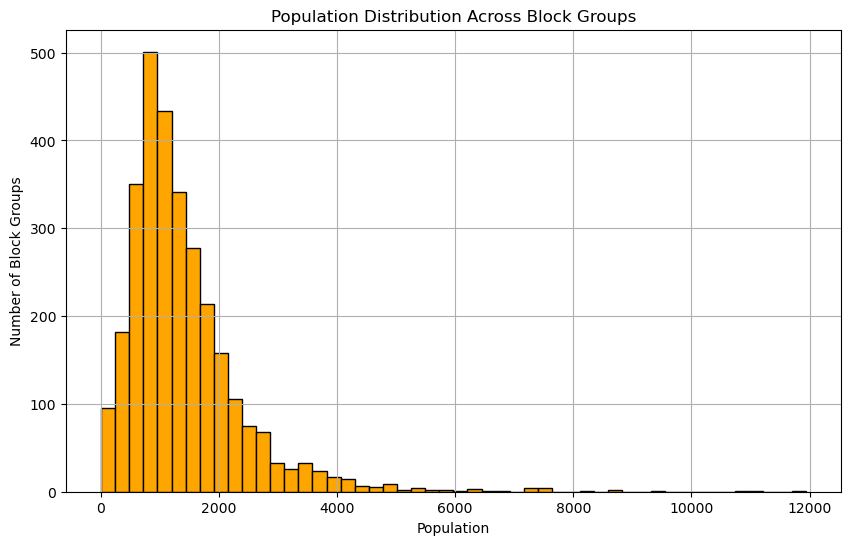

In [ ]:
min_pop = df["population"].min()
max_pop = df["population"].max()
print(f"Minimum Population: {min_pop}")
print(f"Maximum Population: {max_pop}")

plt.figure(figsize=(10, 6))
plt.hist(df["population"], bins=50, color='orange', edgecolor='black')
plt.title("Population Distribution Across Block Groups")
plt.xlabel("Population")
plt.ylabel("Number of Block Groups")
plt.grid(True)
plt.show()


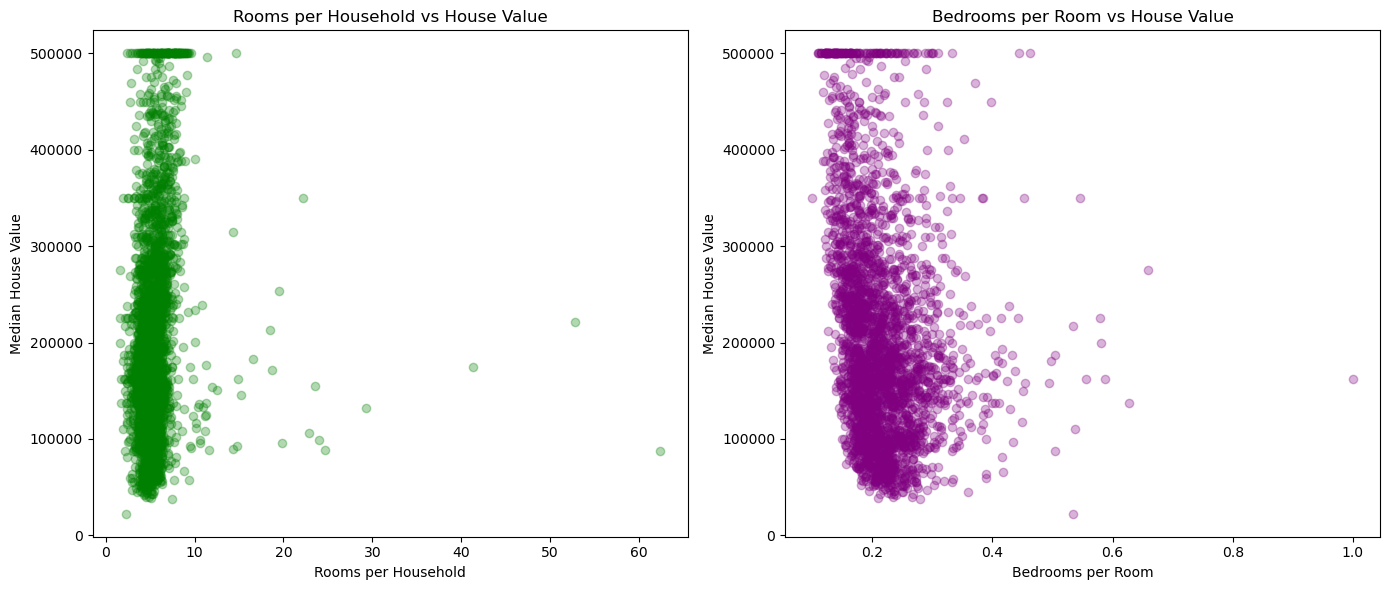

In [22]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df["rooms_per_household"], df["median_house_value"], alpha=0.3, color='green')
plt.title("Rooms per Household vs House Value")
plt.xlabel("Rooms per Household")
plt.ylabel("Median House Value")

plt.subplot(1, 2, 2)
plt.scatter(df["bedrooms_per_room"], df["median_house_value"], alpha=0.3, color='purple')
plt.title("Bedrooms per Room vs House Value")
plt.xlabel("Bedrooms per Room")
plt.ylabel("Median House Value")

plt.tight_layout()
plt.show()

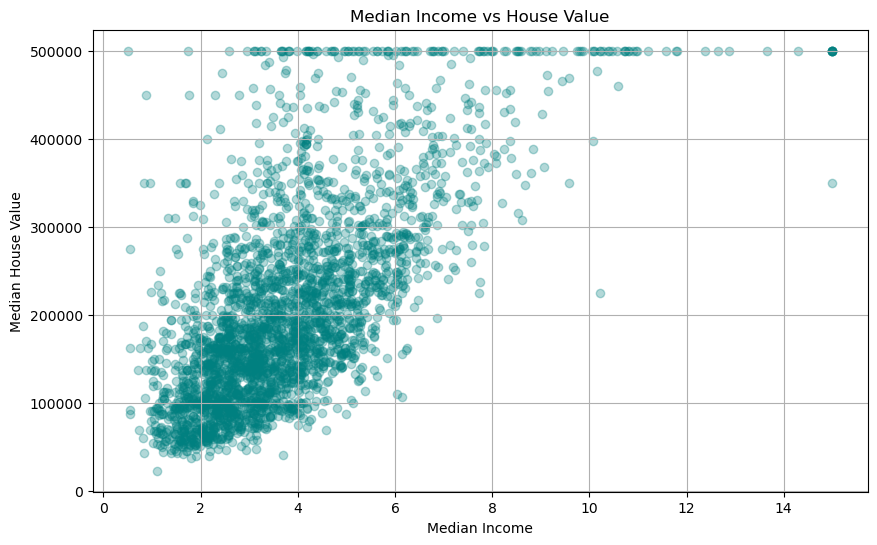

Empty DataFrame
Columns: [median_income, median_house_value, latitude, longitude]
Index: []


In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.3, color='teal')
plt.title("Median Income vs House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()

exceptions = df[(df["median_income"] > 7) & (df["median_house_value"] < 200000)]
print(exceptions[["median_income", "median_house_value", "latitude", "longitude"]].head())


C:\Users\javeedlaptop\AppData\Local\Temp\ipykernel_16596\2359060304.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("age_group")["median_house_value"].mean().reset_index()


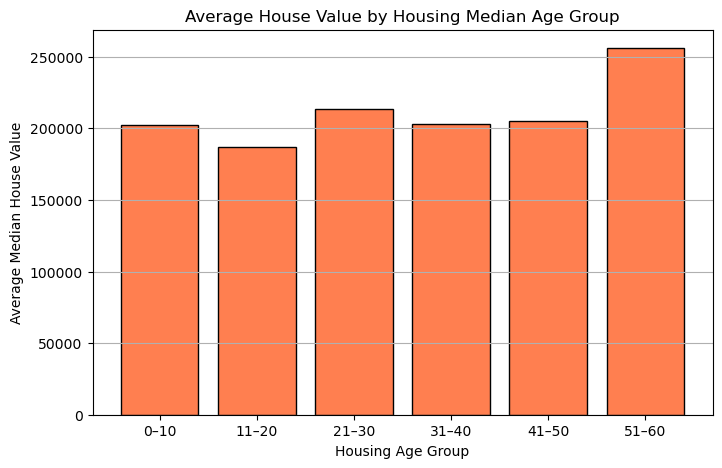

  age_group  median_house_value
0      0–10       202534.809783
1     11–20       186834.232198
2     21–30       213468.148629
3     31–40       203297.580494
4     41–50       205231.741784
5     51–60       256045.580000


In [24]:
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ["0–10", "11–20", "21–30", "31–40", "41–50", "51–60"]
df["age_group"] = pd.cut(df["housing_median_age"], bins=bins, labels=labels, right=False)

grouped = df.groupby("age_group")["median_house_value"].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(grouped["age_group"], grouped["median_house_value"], color="coral", edgecolor="black")
plt.title("Average House Value by Housing Median Age Group")
plt.xlabel("Housing Age Group")
plt.ylabel("Average Median House Value")
plt.grid(axis="y")
plt.show()

print(grouped)
